## Importing the data


In [1]:
import time
import cv2 as cv
import pandas as pd
import os
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

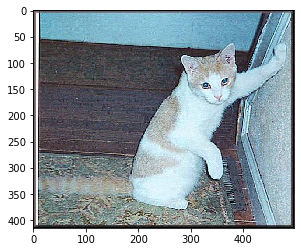

In [2]:
img = cv.imread('Data/Dataset/cat/cat1.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)

In [3]:
# Resize the image
img_height = 500
img_width = 500
img = cv.resize(img, (img_height, img_width))

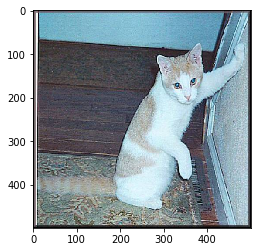

In [4]:
plt.imshow(img)

In [5]:
len(img.flatten())

750000

**Now to enter the whole data**

In [6]:
# Importing Cat images
folder = 'Data/Dataset/cat'
images_cat = []
for filename in os.listdir(folder):
    img = cv.imread(os.path.join(folder,filename))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    if img is not None:
        images_cat.append(img)

images_cat = np.array(images_cat)

In [7]:
images_cat.shape

(10,)

In [8]:
# Importing Dog images
folder = 'Data/Dataset/dog'
images_dog = []
for filename in os.listdir(folder):
    img = cv.imread(os.path.join(folder,filename))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    if img is not None:
        images_dog.append(img)

images_dog = np.array(images_dog)

In [9]:
images_dog.shape

(10,)

In [10]:
def func(a, b, target, model):
    features = []
    # Resizing the images before putting them in as features
    img_height = a
    img_width = b

    for i in range(len(images_cat)):
      # Passing the cat array first
        img = cv.resize(images_cat[i],(img_height,img_width))
        img = np.array(img)
        img = img.flatten()
        features.append(img)

      # Passing the dog array second
        img1 = cv.resize(images_dog[i],(img_height,img_width))
        img1 = np.array(img1)
        img1 = img1.flatten()
        features.append(img1)

    # features
    features = np.array(features)
    print(f"Shape of features : {features.shape}")
    
    # Defining X and Y
    X = features
    y = target
    
    # Test Train split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    X_train_shape = X_train.shape
    y_train_shape = y_train.shape
    X_test_shape  = X_test.shape
    y_test_shape  = y_test.shape

    print(f"X_train: {X_train_shape} , y_train: {y_train_shape}")
    print(f"X_test: {X_test_shape} , y_test: {y_test_shape}")
    assert (X_train.shape[0]==y_train.shape[0] and X_test.shape[0]==y_test.shape[0])
    
    # To calculate the time
    # starting time
    start = time.time()
    
    model.fit(X_train, y_train)
    
        # sleeping for 1 sec to get 10 sec runtime
    time.sleep(1)

    # end time
    end = time.time()

    # total time taken
    print(f"Runtime of the program is {end - start}")
    
    # Testing Accuracy
    y_pred = model.predict(X_test)
    test_accuracy_sklearn = model.score(X_test, y_test)

    print(f"\nAccuracy on testing set: {test_accuracy_sklearn}")
    
    # Training Accuracy
    y_pred = model.predict(X_train)
    train_accuracy_sklearn = model.score(X_train, y_train)
   
    print(f"\nAccuracy on training set: {train_accuracy_sklearn}")
    
    return test_accuracy_sklearn, train_accuracy_sklearn, (end - start)

### Making the target 


In [11]:
# Making the target features
# 1 for cat, 0 for dog    
target = []
for i in range(len(images_cat)+len(images_dog)):
    if(i%2==0):
        target.append(1)
    else:
        target.append(0)

print(f"The target features values: {target}")

target = np.array(target)
print(f"Shape of features : {target.shape}")

The target features values: [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
Shape of features : (20,)


### Initializing the model and calculating the time

In [12]:
model = LogisticRegression(max_iter=100)

In [19]:
# Defining the time storing list
times = []
accuracy_test = []
accuracy_train = []

### Re-run this cell for multiple sizes

In [24]:
'''Re-run this cell with parameters passed in the function
For different values of a,b = 500, 100, 50, 25, 10'''

# Fitting the model
test_acc, train_acc, time_calc = func(10, 10, target, model)

times.append(time_calc)
accuracy_test.append(test_acc)
accuracy_train.append(train_acc)

Shape of features : (20, 300)
X_train: (15, 300) , y_train: (15,)
X_test: (5, 300) , y_test: (5,)


C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Runtime of the program is 1.0033190250396729

Accuracy on testing set: 0.6

Accuracy on training set: 1.0


In [25]:
times

[6.370546340942383,
 1.3452088832855225,
 1.0537309646606445,
 1.0131754875183105,
 1.0033190250396729]

In [26]:
accuracy_test

[0.8, 0.8, 0.8, 0.8, 0.6]

In [27]:
accuracy_train

[1.0, 1.0, 1.0, 1.0, 1.0]

### Bar Graphs

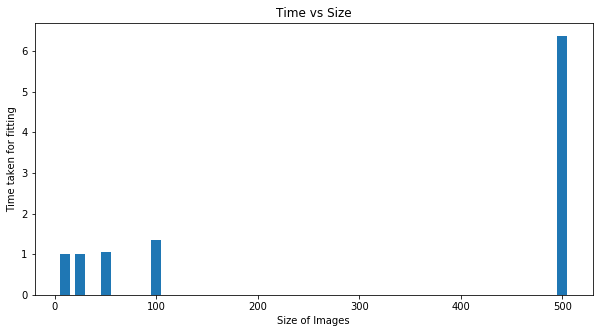

In [40]:
# Defining the X values
sizes = [500, 100, 50, 25, 10]

fig = plt.figure(figsize = (10, 5)) 
plt.bar(sizes, times, width = 10)
plt.xlabel("Size of Images") 
plt.ylabel("Time taken for fitting") 
plt.title("Time vs Size")
plt.show()

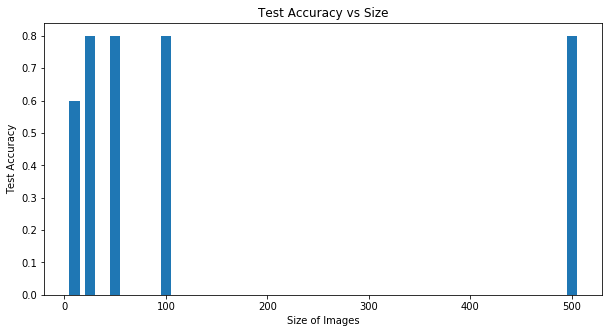

In [39]:
fig = plt.figure(figsize = (10, 5)) 
plt.bar(sizes, accuracy_test, width = 10)
plt.xlabel("Size of Images") 
plt.ylabel("Test Accuracy") 
plt.title("Test Accuracy vs Size")
plt.show()

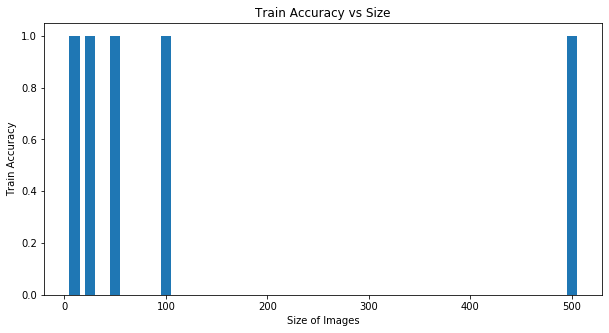

In [38]:
fig = plt.figure(figsize = (10, 5)) 
plt.bar(sizes, accuracy_train, width = 10)
plt.xlabel("Size of Images") 
plt.ylabel("Train Accuracy") 
plt.title("Train Accuracy vs Size")
plt.show()

## Summary

It seems that as we decrease the image size the accuracy falls, same is the case with time.

$$ Size ↑ \,\, ∝ \,\, Time ↑ \,\, ∝ \,\, Accuracy ↑ $$
And vice versa